# PROYECTO ELEMENTOS FINITOS

## Federico Wiesner 

## Miguel Sandoval

## Sergio Arango

 Para el problema de una variable el procedimiento que seguimos fue el siguiente: inicialmente creamos los puntos de \emph{mesh} $x_i$ en los que dividiremos la vara, en $n$ pedazos iguales (tenemos $h = 1/n$). Posteriormente creamos la matriz de coeficientes utilizando la fórmula:
    $$M = \frac{1}{h^2}\begin{pmatrix}
s_0+s_1 & -s_1 & 0&\\
-s_1 & s_1+s_2 & -s_2 & 0&\\
 0& -s_2 & s_2+s_3&-s_3& 0 &\\
 & \ddots & \ddots & \ddots &  \\
 & 0& -s_{n-3} & s_{n-3}+s_{n-2} & -s_{n-2} \\
 & & 0& -s_{n-2} & s_{n-2}+s_{n-1}
\end{pmatrix}.$$
Donde tenemos
$$s_{i} = \frac{h}{2}[c(x_j)+c(x_{j+1})].$$
A continuación creamos el vector $B$ siguiendo la fórmula
$$b_j = h f(x_j).$$
Ya teniendo tanto la matriz como el vector $B$, podemos utilizar el comando np.linealg.solve que permite resolver el sistema lineal 
$$M\mathbf{c}=B,$$
finalmente podemos graficar para diferentes valores de $n$ y comparar con la solución analítica.

C:\Users\fwu19\AppData\Local\Temp\ipykernel_12540\966169543.py:91: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='gray', linestyle='--',alpha=0.3)
C:\Users\fwu19\AppData\Local\Temp\ipykernel_12540\966169543.py:98: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='gray', linestyle='--',alpha=0.3)
C:\Users\fwu19\AppData\Local\Temp\ipykernel_12540\966169543.py:104: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='gray', linestyle='--',alpha=0.3)
C:\Users\fwu19\AppData\Local\Temp\ipykernel_12540\9661

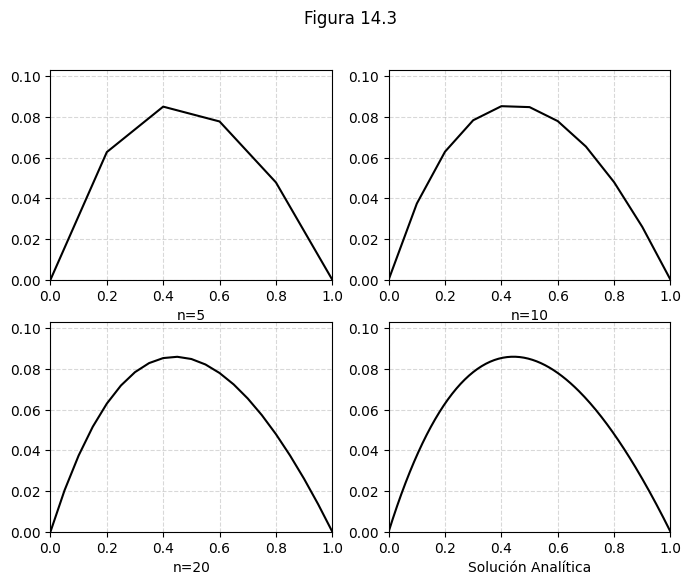

In [23]:
import matplotlib.pyplot as plt
import numpy as np

#Una dimension



def createMesh(l,n):
    mesh = np.zeros((n+1))
    h=l/n
    for j in range(n+1):
        mesh[j] = j*h
    return mesh, h

def finiteElements(c,f,l,n):
    mesh, h = createMesh(l,n)
    coeffMat = createCoeffMatrix(mesh, h, c, n)
    B = vectorB(mesh, h, f, n)
    

    X = np.linalg.solve(coeffMat, B)
    sol = np.zeros((n+1))
    for j in range(n-1):
        sol[j+1] = X[j]
    return sol, mesh

def createCoeffMatrix(mesh, h, c, n):
    M = np.zeros((n-1,n-1))
    
    for j in range(n-1):
        x_j=mesh[j]
        x_j1=mesh[j+1]
        s_j = s_approx(x_j, x_j1, h, c)
        x_j2 = mesh[j+2]
        s_j1 = s_approx(x_j1, x_j2, h, c)
        for i in range(max(0,j-1),min(j+2,n-1)):
            if i==j:
                M[j][i]=(s_j+s_j1)/(h*h)
            elif i<j:
                M[j][i] = (-s_j)/(h*h)
            else:
                M[j][i] = (-s_j1)/(h*h)
    return M


def s_approx(x_j,x_j1, h, c):
    return (h/2)*(c(x_j)+c(x_j1))

def vectorB(mesh, h, f, n):
    B = np.zeros((n-1))
    for j in range(n-1):
        x_j = mesh[j+1]
        B[j] = h* f(x_j)
    return B


#Ejemplo 14.3:
#parametros ejemplo 14.3:
l=1

def c(x):
    return x+1

def f(x):
    return 1




#sol por elemntos finitos
sol5, mesh5 = finiteElements(c,f,l,5)
sol10, mesh10 = finiteElements(c,f,l,10)
sol20, mesh20 = finiteElements(c,f,l,20)

#sol analítica
def sol_analitica(x):
    return -x + np.log(x+1)/np.log(2)


#grafica real
x_axis = createMesh(l,200)[0]
y_axis = np.zeros((200+1))
for j in range(201):
    y_axis[j] = sol_analitica(x_axis[j])

tamanio_eje_y = max(y_axis)*1.2

fig, ax = plt.subplots(figsize = [8,6])
plt.subplot(2,2,1)
plt.axis([0,l, 0, tamanio_eje_y])
plt.plot(mesh5,sol5,color='black')
plt.grid(b=True, which='major', color='gray', linestyle='--',alpha=0.3)
plt.xlabel("n=5")


plt.subplot(2,2,2)
plt.axis([0,l, 0, tamanio_eje_y])
plt.plot(mesh10,sol10,color='black')
plt.grid(b=True, which='major', color='gray', linestyle='--',alpha=0.3)
plt.xlabel("n=10")

plt.subplot(2,2,3)
plt.axis([0,l, 0, tamanio_eje_y])
plt.plot(mesh20,sol20,color='black')
plt.grid(b=True, which='major', color='gray', linestyle='--',alpha=0.3)
plt.xlabel("n=20")

plt.subplot(2,2,4)
plt.axis([0,l, 0, tamanio_eje_y])
plt.plot(x_axis,y_axis,color='black')
plt.grid(b=True, which='major', color='gray', linestyle='--',alpha=0.3)
plt.xlabel("Solución Analítica")




fig.suptitle('Figura 14.3')

plt.show()





Para el segundo problema, nuestro paso inicial es crear las figuras manualmente. Después de esto creamos un arreglo que contiene la información de los triángulos que queremos, es decir los vértices que pertenecen al triángulo (en orden, es decir si es rectángulo el primero es del ángulo recto) y el tipo de triángulo que es (rectángulo o equilátero). Ya teniendo esta información procedemos a calcular las entradas de la matriz $K$, pues podemos saltarnos totalmente el cálculo de las entradas que no nos sirven. Para la triangulación definida los vértices internos son 1, 2, 3 y estos son los importantes ya que la temperatura en los bordes del plato no cambia. Las entradas de la matriz son las siguientes:
$$k_{ij} = \sum_{x_i,x_j\in\Delta}\tilde{K}^{\Delta}_{ij}.$$
Es decir es la suma de las entradas en las matrices de $\textit{stiffness}$ para los triángulos a los que pertenecen tanto el vértice $x_i$ como el $x_j$, nótese que esto es equivalente a calcular la suma de todas estas matrices y después tomar la submatriz cuadrada que deseamos. Estas entradas dependen del tipo de triángulo y de la posición del vértice, se encuentran en las fórmulas 14.45 y 14.46 del artículo. Ya habiendo construido esta matriz procedemos a crear el vector b, que se crea a partir de la fórmula
$$b_i = \frac{1}{3}f(x_i,y_i)A_{P_i},$$
donde el punto $(x_i,y_i)$ corresponde al punto interno que se quiere y $A_{P_i}$ es el área del polígono que se forma con los triángulos a los que pertenece este punto. Finalmente volvemos a aplicar el np.linealg.solve con la matriz $K$ y el vector $b$ y así obtenemos el vector $c$ de temperaturas de equilibrio del plato. También encontramos la matriz $\tilde{K}$ y el vector $H$ que pide el documento. Con todos los puntos hallados acabamos graficando.

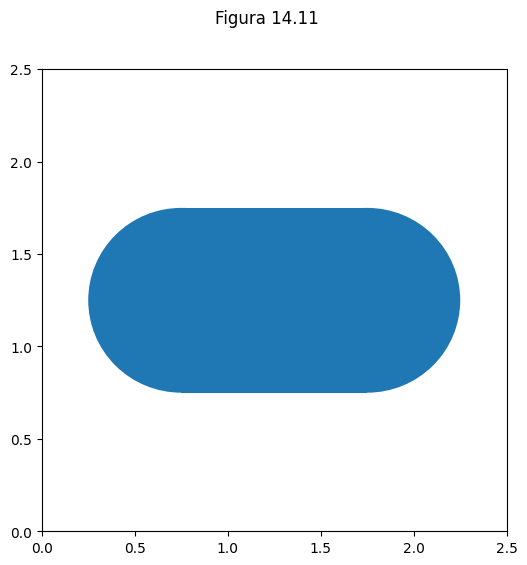

In [27]:
#figura 14.11
from textwrap import fill
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

#define Matplotlib figure and axis
fig, ax = plt.subplots(figsize=[6,6])

plt.axis([0,2.5,0,2.5])

#add rectangle to plot
ax.add_patch(Rectangle((0.75, 0.75), 1, 1))

#create circles 
c1=plt.Circle((0.75, 1.25), radius=0.5)
c2=plt.Circle((1.75, 1.25), radius=0.5)

#add circle to plot (gca means "get current axis")
plt.gca().add_artist(c1)
plt.gca().add_artist(c2)


fig.suptitle("Figura 14.11")
#display plot
plt.show()

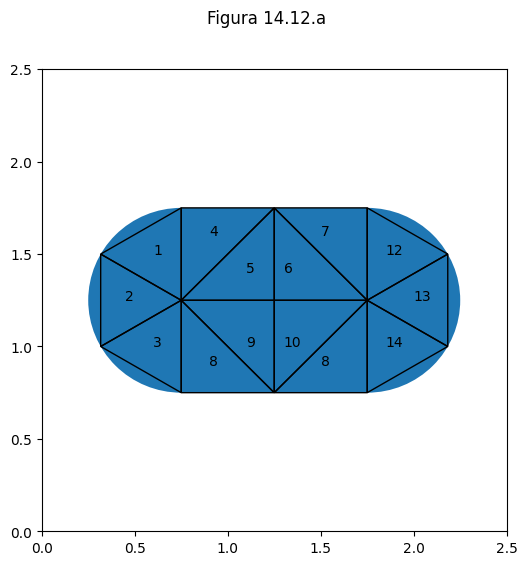

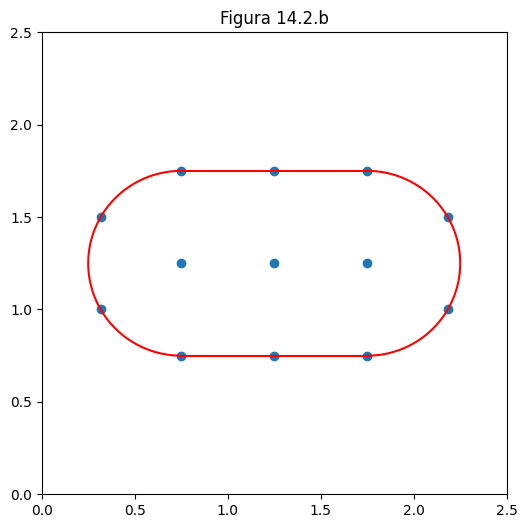

In [2]:
#Figura 14.12
from cProfile import label
from textwrap import fill
from turtle import color
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
from matplotlib.patches import Polygon

#define Matplotlib figure and axis
fig, ax = plt.subplots(figsize=[6,6])

plt.axis([0,2.5,0,2.5])

#add rectangle to plot
ax.add_patch(Rectangle((0.75, 0.75), 1, 1))


#create circles 
c1=plt.Circle((0.75, 1.25), radius=0.5)
c2=plt.Circle((1.75, 1.25), radius=0.5)

#add circle to plot (gca means "get current axis")
plt.gca().add_artist(c1)
plt.gca().add_artist(c2)

#triangulos
#8
pts = np.array([[0.75,0.75], [1.25,0.75], [0.75,1.25]])
p = Polygon(pts, closed=True, fill=False)
plt.gca().add_artist(p)
ax.text(0.9,0.9,'8')

#4
pts = np.array([[0.75,1.75], [1.25,1.75], [0.75,1.25]])
p = Polygon(pts, closed=True, fill=False)
plt.gca().add_artist(p)
ax.text(0.9,1.6,'4')

#7
pts = np.array([[1.75,1.75], [1.25,1.75], [1.75,1.25]])
p = Polygon(pts, closed=True, fill=False)
plt.gca().add_artist(p)
ax.text(1.5,1.6,'7')

#11
pts = np.array([[1.75,0.75], [1.25,0.75], [1.75,1.25]])
p = Polygon(pts, closed=True, fill=False)
plt.gca().add_artist(p)
ax.text(1.5,0.9,'8')

#9
pts = np.array([[1.25,1.25], [1.25,0.75], [0.75,1.25]])
p = Polygon(pts, closed=True, fill=False)
plt.gca().add_artist(p)
ax.text(1.1,1,'9')

#10
pts = np.array([[1.25,1.25], [1.25,0.75], [1.75,1.25]])
p = Polygon(pts, closed=True, fill=False)
plt.gca().add_artist(p)
ax.text(1.3,1,'10')

#6
pts = np.array([[1.25,1.25], [1.25,1.75], [1.75,1.25]])
p = Polygon(pts, closed=True, fill=False)
plt.gca().add_artist(p)
ax.text(1.3,1.4,'6')

#5
pts = np.array([[1.25,1.25], [1.25,1.75], [0.75,1.25]])
p = Polygon(pts, closed=True, fill=False)
plt.gca().add_artist(p)
ax.text(1.1,1.4,'5')

#12
pts = np.array([[1.75,1.75], [1.75+np.sqrt(3)/4,1.5], [1.75,1.25]])
p = Polygon(pts, closed=True, fill=False)
plt.gca().add_artist(p)
ax.text(1.85,1.5,'12')

#14
pts = np.array([[1.75,0.75], [1.75+np.sqrt(3)/4,1], [1.75,1.25]])
p = Polygon(pts, closed=True, fill=False)
plt.gca().add_artist(p)
ax.text(1.85,1,'14')

#1
pts = np.array([[0.75,1.75], [0.75-np.sqrt(3)/4,1.5], [0.75,1.25]])
p = Polygon(pts, closed=True, fill=False)
plt.gca().add_artist(p)
ax.text(0.6,1.5,'1')

#3
pts = np.array([[0.75,0.75], [0.75-np.sqrt(3)/4,1], [0.75,1.25]])
p = Polygon(pts, closed=True, fill=False)
plt.gca().add_artist(p)
ax.text(0.6,1,'3')

#2
pts = np.array([[0.75-np.sqrt(3)/4,1], [0.75-np.sqrt(3)/4,1.5], [0.75,1.25]])
p = Polygon(pts, closed=True, fill=False)
plt.gca().add_artist(p)
ax.text(0.45,1.25,'2')

#13
pts = np.array([[1.75+np.sqrt(3)/4,1], [1.75+np.sqrt(3)/4,1.5], [1.75,1.25]])
p = Polygon(pts, closed=True, fill=False)
plt.gca().add_artist(p)
ax.text(2,1.25,'13')




fig.suptitle("Figura 14.12.a")
#display plot
plt.show()


fig, ax = plt.subplots(figsize=[6,6])
plt.axis([0,2.5,0,2.5])
#
# First create the x and y coordinates of the points.
#lineas rectas
plt.plot((0.75,1.75),(0.75,0.75), 'r')
plt.plot((0.75,1.75),(1.75,1.75), 'r')

ang = np.linspace(-np.pi/2, np.pi/2, 100)
#semicirculo derecho
xright = 1.75 + 0.5*np.cos(ang)
yright = 1.25 + 0.5*np.sin(ang)
#semicirculo izquierdo
xleft = 0.75 - 0.5*np.cos(ang)
yleft = 1.25 + 0.5*np.sin(ang)
plt.plot(xright, yright, 'r')
plt.plot(xleft, yleft, 'r')

xgrid = [0.75,1.25,1.75]
ygrid = [0.75, 1.25, 1.75]
grid = np.meshgrid(xgrid, ygrid)
grid_x = np.append(grid[0], [0.75+0.5*np.cos(np.pi-np.pi/6), 0.75+0.5*np.cos(np.pi+np.pi/6), 1.75 + 0.5*np.cos(np.pi/6), 1.75 + 0.5*np.cos(np.pi/6) ])
grid_y = np.append(grid[1], [1.25 + 0.5*np.sin(np.pi-np.pi/6), 1.25 + 0.5*np.sin(np.pi+np.pi/6), 1.25 + 0.5*np.sin(np.pi/6), 1.25 - 0.5*np.sin(np.pi/6) ])

p_crudos = {i:(grid_x[i],grid_y[i]) for i in range(len(grid_x))}
#numero artoiculo, numero nuestro
p = {}
p[1] = (p_crudos[3],'I')
p[2] = (p_crudos[4],'I')
p[3] = (p_crudos[5],'I')
p[4] = (p_crudos[7],'F')
p[5] = (p_crudos[6],'F')
p[6] = (p_crudos[9],'F')
p[7] = (p_crudos[10],'F')
p[8] = (p_crudos[0],'F')
p[9] = (p_crudos[1],'F')
p[10] = (p_crudos[2],'F')
p[11] = (p_crudos[12],'F')
p[12] = (p_crudos[11],'F')
p[13] = (p_crudos[8],'F')




plt.scatter(grid_x, grid_y)
plt.title('Figura 14.2.b')
plt.show()

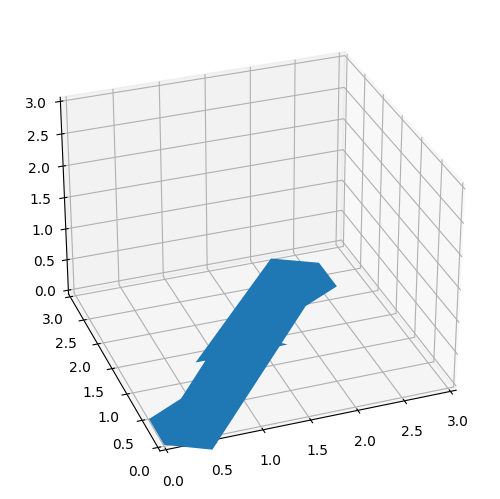

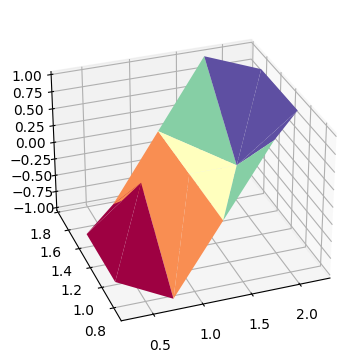

In [8]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.tri as mtri

def createMesh():
    
    triangulos = []
    triangulos.append([8,1,9,'R'])
    triangulos.append([2,1,9,'R'])
    triangulos.append([10,3,9,'R'])
    triangulos.append([2,3,9,'R'])
    triangulos.append([5,1,4,'R'])
    triangulos.append([2,1,4,'R'])
    triangulos.append([2,3,4,'R'])
    triangulos.append([13,3,4,'R'])
    triangulos.append([5,1,6,'E'])
    triangulos.append([8,1,7,'E'])
    triangulos.append([6,1,7,'E'])
    triangulos.append([3,12,13,'E'])
    triangulos.append([3,12,11,'E'])
    triangulos.append([3,10,11,'E'])



    return triangulos


def finiteElements(f,h):
    mesh = createMesh()
    K,K_front = createCoeffMatrix(mesh)
    B,H = vectorBH(mesh,h,f)
    #H = np.asarray([0,-1,-1,-1,-1,0,1,1,1,1])
    g=B-K_front.dot(H)
    X = np.linalg.solve(K, g)

    return  X

def createCoeffMatrix(mesh):
    #crear K_v reducida para cada v
    #sumar las k_v reducidas
    Int,Front = puntosInt()
    numInt = len(Int)
    numFront = len(Front)
    matriz_K = np.zeros((numInt,numInt))
    matriz_K_frontera = np.zeros((numInt,numFront))
    for Tv in mesh:
        for i in range(numInt):
            for j in range(numInt+numFront):
                if j<numInt:
                    
                    if Tv[3]=='R':
                        if i+1 in Tv and j+1 in Tv:
                            if i+1==j+1:
                                if Tv[0]==i+1:
                                    matriz_K[i][j] += 1
                                else:
                                    matriz_K[i][j] += 0.5
                            else:
                                if Tv[0]==i+1 or Tv[0]==j+1:
                                    matriz_K[i][j] += -0.5
                                else:
                                    matriz_K[i][j] += 0 
                        
                    elif Tv[3]=='E':
                        if i+1 in Tv and j+1 in Tv:
                            if i+1==j+1:
                                matriz_K[i][j] += 1/np.sqrt(3)
                            else:
                                matriz_K[i][j] += -1/(2*np.sqrt(3))
                else:
                    if Tv[3]=='R':
                        if i+1 in Tv and j+1 in Tv:
                            if i+1==j+1:
                                if Tv[0]==i+1:
                                    matriz_K_frontera[i][j-numInt] += 1
                                else:
                                    matriz_K_frontera[i][j-numInt] += 0.5
                            else:
                                if Tv[0]==i+1 or Tv[0]==j+1:
                                    matriz_K_frontera[i][j-numInt] += -0.5
                                else:
                                    matriz_K_frontera[i][j-numInt] += 0 
                        
                    elif Tv[3]=='E':
                        if i+1 in Tv and j+1 in Tv:
                            if i+1==j+1:
                                matriz_K_frontera[i][j-numInt] += 1/np.sqrt(3)
                            else:
                                matriz_K_frontera[i][j-numInt] += -1/(2*np.sqrt(3))

    return matriz_K, matriz_K_frontera


def puntosInt():
    interiores = []
    exteriores = []
    for punto in p:
        if p[punto][-1]=='I':
            interiores.append(punto)
        elif p[punto][-1]=='F':
            exteriores.append(punto)
    return interiores, exteriores

def areas(puntosInt, mesh):
    areas = []
    for p in puntosInt:
        area_p=0
        for Pv in mesh:
            if p in Pv:
                #calcule area de Tv y sumesela
                areaPv = areaPoligono(Pv)
                area_p=area_p+areaPv
        areas.append(area_p)
    return areas

def areaPoligono(Pv):
    if len(Pv)==4:
        #es triangulo
        if Pv[3]=='E':
            #segun federico
            return np.sqrt(3)/8
        elif Pv[3]=='R':
            x0,y0 = p[Pv[0]][0]
            x1,y1 = p[Pv[1]][0]

            dx = abs(x1-x0)
            dy = abs(y1-y0)
            d = max(dx,dy)
            return d*d/2


def vectorBH(mesh,h, f):
    Int, Front = puntosInt()
    numInt = len(Int)
    numFront = len(Front)
    areaS = areas(Int, mesh)
    B = np.zeros((numInt))
    H = np.zeros((numFront))
    for i in range(numInt+numFront):
        if i<numInt:
            x,y = p[Int[i]][0]
            B[i]=f(x,y)*areaS[i]/3
        else:
            x,y = p[Front[i-numInt]][0]
            H[i-numInt] = h(x,y)
    return B, H


#parametros ejemplo
def f(x,y):
    return 4

def h(x,y):
    return 0


def darXYpuntos():
    X = []
    Y = []
    for i in range(len(p)):
        punto = p[i+1]
        X.append(punto[0][0])
        Y.append(punto[0][1])
    return X, Y

def graficar3D():
    X, Y = darXYpuntos()
    H=[0,-1,-1,-1,-1,0,1,1,1,1]
    Z = finiteElements(f, h)
    for num in H:
        Z = np.append(Z,num)
    fig = plt.figure()
    ax = Axes3D(fig, auto_add_to_figure=False)
    ax.set_xlim3d(0, 3)
    ax.set_ylim3d(0, 3)
    ax.set_zlim3d(0, 3)
    fig.add_axes(ax)
    verts = [list(zip(X,Y,Z))]
    ax.add_collection3d(Poly3DCollection(verts))
    ax.view_init(30, 250)
    plt.show()


    
        

graficar3D()
##grafica azul


fig = plt.figure(figsize=plt.figaspect(0.5))

x, y = darXYpuntos()


H = [0,-1,-1,-1,-1,0,1,1,1,1]
z = finiteElements(f, h)
for num in H:
    z = np.append(z,num)

tri = mtri.Triangulation(x, y)

# Plot the surface.  The triangles in parameter space determine which x, y, z
# points are connected by an edge.
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles, cmap=plt.cm.Spectral)
ax.set_zlim(-1, 1)
ax.view_init(30, 250)



#para correr:
#ejecutar 
#finiteElements(f,h)
#esto retorna un vector de tres valores 
# que corresponden a los tres nodos interiores

#los otros diez valores son
# como lista:
#  H=[0,-1,-1,-1,-1,0,1,1,1,1,0]
#como vector:
#H = np.asarray([0,-1,-1,-1,-1,0,1,1,1,1,0])

#graficar consiste en asignar x,y,z 
# x,y se pueden obtener de el diccionario p que esta definido en el bloque de arriba
# donde z esta dado por la solucion para los 3 interiores
#y los otros 10 por H

#ojo que el formato de p es p[numeroDeNodo]=((x,y),Tipo)
#es una tupla y el primer elemento es de nuevo una tupla
